<h1 style='text-align:center'>Python Intro to Loops and Integrals </h1>

<strong>
    TF: Maurice Wilson<br>
    Astron 100 Section<br>
    Spring 2021
</strong>

<h3>Loops</h3>

In [2]:
import numpy as np

#
# make an array with five elements whose values are arbitrary numbers
#

# -- first use FOR loop to print out the five numbers
print('five numbers')
for i in range(5):
    print( i*2 + i )

    
# -- use a FOR loop
data = []
for i in range(5):
    data.append( i*2 + i  )
    
data = np.array( data )
print('used FOR loop')
print(data)
del data


# -- use a WHILE loop
data = []
i = 0
while len(data) < 5:
    data.append( i*2 + i )
    i += 1
    
data = np.array( data )
print('used WHILE loop')
print(data)
del data


# -- use a list comprehension
data = [  i*2 + i  for i in range(5) ]
data = np.array( data )
print('used list comprehension')
print(data)


five numbers
0
3
6
9
12
used FOR loop
[ 0  3  6  9 12]
used WHILE loop
[ 0  3  6  9 12]
used list comprehension
[ 0  3  6  9 12]


List comprehensions are powerful.  They run faster than FOR loops although the syntax is very similar to a FOR loop.  Also, a list comprehension is an aesthetically, concise way of writing code for a loop.  

In [4]:
#
# use dictionary comprehension to loop through keys and values to make a dictionary
#

dkeys = ['phones', 'cars', 'babies', 'pets', 'schools'] # these will be keys for the dictionary
dvalues = [0, 3, 6, 9, 12]  # these will be values for the dictionary's keys

d_hardcode = {'phones': 0 , 'cars': 3, 'babies': 6, 'pets': 9, 'schools': 12}

d_compreh = { dkeys[i]: dvalues[i]   for i in range( len(dkeys) )   }


print(d_hardcode)
print(d_compreh)

{'phones': 0, 'cars': 3, 'babies': 6, 'pets': 9, 'schools': 12}
{'phones': 0, 'cars': 3, 'babies': 6, 'pets': 9, 'schools': 12}


<h3>Area under Curve</h3>

In [5]:
import matplotlib.pyplot as plt
plt.ion() # only useful in 

In [6]:
def normaldist( x_pts, lamb, sigmawidth, normalized=True ):
    '''
    Normal probability distribution function (PDF)
    '''
    if normalized:
        return 1.0/(sigmawidth* np.sqrt(2*np.pi) ) * np.exp( -1./2 *( (x_pts-lamb)/sigmawidth )**2 )
    else:
        return                                       np.exp( -1./2 *( (x_pts-lamb)/sigmawidth )**2 )


In [11]:
x_guesses = np.linspace(-20,20)

x_expect, width = 7, 2

y_model = normaldist(x_guesses, lamb=x_expect, sigmawidth=width)

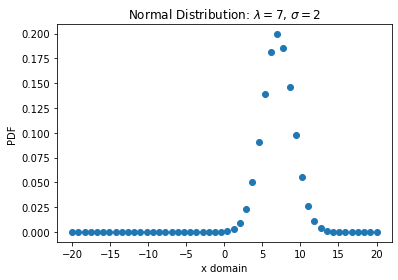

In [12]:
fig, ax = plt.subplots()
ax.plot( x_guesses, y_model, 'o' )
ax.set_xlabel('x domain')
ax.set_ylabel('PDF')
ax.set_title(f"Normal Distribution: $\lambda={x_expect}$, $\sigma={width}$")

plt.show()
plt.close()


If the PDF is normalized, then the following is true:

$\int^\infty_{-\infty} \rm{PDF} = 1$

Let's test that out with our PDF.



In [14]:
# 
# take integral across entire PDF.  There are many ways to integrate numerically in Python
# -- don't forget, you can always just analytically solve for your PDF's normalization constant 
#

delta_x = x_guesses[1]-x_guesses[0]
total_int = np.trapz(y_model, dx=delta_x)  # you can use the trapezoidal rule to estimate integrals

print(total_int)

0.999999999938051


In [21]:
y_model_unnorm = normaldist(x_guesses, lamb=x_expect, sigmawidth=width, normalized=False)
total_int = np.trapz(y_model_unnorm, dx=delta_x)

print(total_int)  # this total (unnormalized) integral can act as our normalization constant to divide by.

# check to see if the analytically given normalization constant, ( sigma* sqrt(2*pi) ), is the same as our numerically found normalization constant   
print(  width*np.sqrt(2*np.pi)  )

5.013256548951434
5.0132565492620005


In [18]:
#
# let's integrate in a different way.
#

from scipy.integrate import quad

total_int = quad( normaldist, -15, 15, args=(x_expect, width) )  # integrate the given function (my PDF) from -15 to 15

print(total_int)

(0.999968328758167, 2.9751860118655683e-09)


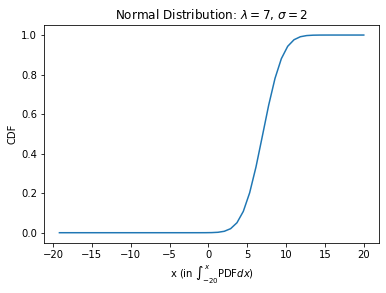

In [25]:
#
# With knowlege of loops, comprehensions, and integrals, can you calculate the cumulative distribution function?
# 

# calculate the series of integrals using a set of two data points to start with and ending with a set of all data points 
# <--insert code-->


# plot CDF
# <--insert code-->